In [2]:
test = [1,2,3]
print(test[-1:])
import sys
sys.path.append("./../utils/")
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

#Modules of src folder
import preproc as pp

[3]


In [3]:
import pandas as pd
from datetime import date
import holidays
from workalendar.europe import Germany
import numpy as np

df = pp.load_data("./../data/ts_60_sindex_DE_3f.csv")
df = pp.preprocess(df)
df = df[["DE_load_actual_entsoe_transparency", "year", "day"]].iloc[24*92:24*98]

years = range(2015,2021,1)
holidays_GER = [holiday for holiday in holidays.Germany(years=years)]
df_dates = pd.DataFrame(df.index.date)
print(holidays_GER)
df["isholiday"] = df_dates.isin(holidays_GER).values.astype(int)
df_dayofweek = pd.DataFrame(df.index.dayofweek)
df["isSunday"] = df_dayofweek.isin([6]).values.astype(int)
df["isSaturday"] = df_dayofweek.isin([5]).values.astype(int)
df.head(30)



AttributeError: module 'preproc' has no attribute 'load_data'

In [ ]:
import pandas as pd
import holidays

# Assuming your 'pp.load_data' and 'pp.preprocess' functions are defined elsewhere and working.
df = pp.load_data("./../data/ts_60_sindex_DE_3f.csv")
df = pp.preprocess(df)
df = df["DE_load_actual_entsoe_transparency","day"].iloc[0:1000]

# Generate a list of holidays for the given years
years = range(2015, 2021)
holidays_GER = [date for year in years for date in holidays.Germany(years=year)]

# Ensure that your dataframe index is of type datetime
df.index = pd.to_datetime(df.index)

series = pd.DataFrame(df.index.date)

# Create the one-hot encoded column
df['is_holiday'] = series.isin(holidays_GER).astype(int)

print(df.head())
print(df.columns)


KeyError: ('DE_load_actual_entsoe_transparency', 'day')

In [4]:
w = 10
h = 10
length = 33
seq_length = w + h

for i in range(0,length-seq_length, w):
    print(i, " ", i+w, " ", i+w+h)

0   10   20
10   20   30


In [5]:
w = 10
h = 10
length = 40
seq_length = w + h

for i in range(0,length-seq_length, w):
    print(i, " ", i+w, " ", i+w+h)

0   10   20
10   20   30


In [6]:
w = 5
h = 10
length = 40
seq_length = w + h

for i in range(0,length-seq_length, w):
    print(i, " ", i+w, " ", i+w+h)

0   5   15
5   10   20
10   15   25
15   20   30
20   25   35


In [7]:
def pipeline(uno, dos):
    print(uno)
    print(dos)

dic = {"dos":10, "uno":20}
print(dic["dos"])
arr = [1,2]
print(*arr)
pipeline(**dic)

10
1 2
20
10


In [8]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

dic = dotdict(dic)
dic.dos
dic.dos = 20
del(dic.dos)
dic

dic.dic2 = dotdict({})
dic.dic2.hello = 2
print(dic)

{'uno': 20, 'dic2': {'hello': 2}}


# What does error metric do if target dimensionality is larger than 1?

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_true = [[0.5, 25],[-1, 10],[2, -6], [9,1]]
y_pred = [[0, 2],[-1, 2],[8, -5], [2,6]]
length = len(y_true)
print(mean_squared_error(y_true, y_pred, squared=False))
print(mean_squared_error(y_true, y_pred) **0.5)




8.528200816389788
9.382497002397603


In [10]:
import numpy as np
arr = np.array([((true[0] - pred[0])**2, (true[1] - pred[1])**2) for true, pred in zip(y_true, y_pred)])
print(arr)
arr = (1/ length* np.sum(arr, axis=0))**0.5
print(arr)
arr = 0.5 * np.sum(arr, axis=-1)
print(arr)

# ---> Result: sklearn first computes rmse for every dimension and then averages. This is how the mulit dimensional rmse should be calculated

[[2.50e-01 5.29e+02]
 [0.00e+00 6.40e+01]
 [3.60e+01 1.00e+00]
 [4.90e+01 2.50e+01]]
[ 4.61654633 12.4398553 ]
8.528200816389788


In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

scaler = StandardScaler()
arr = np.array([[1],[2],[3]])
arr_scaled = scaler.fit_transform(arr)
print(scaler.get_params())
print(arr_scaled)
arr_scaled2= np.repeat(arr_scaled, 3, axis=1)
arr_scaled2[0,1] = -1
arr_rescaled = scaler.inverse_transform(arr_scaled2)
print(arr_rescaled)


{'copy': True, 'with_mean': True, 'with_std': True}
[[-1.22474487]
 [ 0.        ]
 [ 1.22474487]]
[[1.         1.18350342 1.        ]
 [2.         2.         2.        ]
 [3.         3.         3.        ]]


In [12]:
#import pandas as pd
#df = pd.DataFrame({"A":[1,2,3], "B":[4,5,6]})


for i in range(0,2,2):
    print(i)


0


In [13]:
(1.51 * 24 + 1.0 * 18 + 15 * 1.7 + 6 * 1.3 + 9 * 1.0 + 3 * 1.0) / (24+18+30+3)

1.3272000000000002

In [14]:
import torch
x = torch.rand((2,6,4))
x

tensor([[[0.0412, 0.5561, 0.3932, 0.9025],
         [0.0365, 0.4193, 0.0926, 0.7166],
         [0.2153, 0.0146, 0.6820, 0.7265],
         [0.9382, 0.8759, 0.3992, 0.2185],
         [0.7779, 0.8717, 0.2100, 0.0883],
         [0.0333, 0.6609, 0.8918, 0.3295]],

        [[0.5160, 0.4311, 0.8420, 0.7996],
         [0.0198, 0.1928, 0.5428, 0.6769],
         [0.6492, 0.9890, 0.0107, 0.3309],
         [0.5175, 0.2173, 0.5726, 0.8755],
         [0.8080, 0.5379, 0.7746, 0.5921],
         [0.8261, 0.3748, 0.3618, 0.1849]]])

In [15]:
x.view(2,6,2,-1)

tensor([[[[0.0412, 0.5561],
          [0.3932, 0.9025]],

         [[0.0365, 0.4193],
          [0.0926, 0.7166]],

         [[0.2153, 0.0146],
          [0.6820, 0.7265]],

         [[0.9382, 0.8759],
          [0.3992, 0.2185]],

         [[0.7779, 0.8717],
          [0.2100, 0.0883]],

         [[0.0333, 0.6609],
          [0.8918, 0.3295]]],


        [[[0.5160, 0.4311],
          [0.8420, 0.7996]],

         [[0.0198, 0.1928],
          [0.5428, 0.6769]],

         [[0.6492, 0.9890],
          [0.0107, 0.3309]],

         [[0.5175, 0.2173],
          [0.5726, 0.8755]],

         [[0.8080, 0.5379],
          [0.7746, 0.5921]],

         [[0.8261, 0.3748],
          [0.3618, 0.1849]]]])

In [16]:
df_raw = pd.DataFrame(
    {"date": ["2019-01-23 23:00", "2019-02-23 23:00", "2020-03-24 23:00", "2020-09-23 23:00", "2020-01-23 23:00", "2021-01-13 23:00", "2021-01-23 23:00", "2021-02-23 23:00", "2022-01-23 23:00", "2022-02-23 23:00", "2023-01-23 23:00", "2023-02-23 23:00"],
    "val1": [1,2,3,4,5,6,7,8,9,10,11,12]}
)
df_raw

,date,val1
0,2019-01-23 23:00,1
1,2019-02-23 23:00,2
2,2020-03-24 23:00,3
3,2020-09-23 23:00,4
4,2020-01-23 23:00,5
5,2021-01-13 23:00,6
6,2021-01-23 23:00,7
7,2021-02-23 23:00,8
8,2022-01-23 23:00,9
9,2022-02-23 23:00,10


In [17]:
df_raw = df_raw.rename(columns={"asdf": "asd"})
df_raw

,date,val1
0,2019-01-23 23:00,1
1,2019-02-23 23:00,2
2,2020-03-24 23:00,3
3,2020-09-23 23:00,4
4,2020-01-23 23:00,5
5,2021-01-13 23:00,6
6,2021-01-23 23:00,7
7,2021-02-23 23:00,8
8,2022-01-23 23:00,9
9,2022-02-23 23:00,10


In [18]:
df_raw["date"] = pd.to_datetime(df_raw["date"])
mask_train = df_raw['date'].dt.year < 2021
# Index + 1 is the number of training elements
num_train = df_raw[mask_train].last_valid_index() + 1 
mask_val = df_raw['date'].dt.year == 2021
# Substract the indexes for the number of validation elements
num_val = df_raw[mask_val].last_valid_index() - (num_train - 1) 
num_test = len(df_raw) - num_train - num_val

print(num_train)
print(num_val)
print(num_test)

assert num_test > 0
assert num_train > num_test > num_val



5
3
4


In [19]:
df_raw

,date,val1
0,2019-01-23 23:00:00,1
1,2019-02-23 23:00:00,2
2,2020-03-24 23:00:00,3
3,2020-09-23 23:00:00,4
4,2020-01-23 23:00:00,5
5,2021-01-13 23:00:00,6
6,2021-01-23 23:00:00,7
7,2021-02-23 23:00:00,8
8,2022-01-23 23:00:00,9
9,2022-02-23 23:00:00,10


In [30]:
np.allclose(df_raw.date.dt.month, df_raw.date.apply(lambda row: row.month))

True

In [35]:
x = torch.tensor([1, 2, 3, 4])
print(x.shape)
x.unsqueeze(1).shape

torch.Size([4])


torch.Size([4, 1])

In [36]:
torch.arange(0, 12, 2).float()

tensor([ 0.,  2.,  4.,  6.,  8., 10.])

In [38]:
np.sin([0,2*np.pi, 62/10, 63/10, 125/10, 126/10])

array([ 0.00000000e+00, -2.44929360e-16, -8.30894028e-02,  1.68139005e-02,
       -6.63218974e-02,  3.36230472e-02])

In [46]:
x = np.sin(np.arange(0,10000000))

len(np.unique(x)) == len(x)

True

In [4]:
import pandas as pd

# Define the levels for the MultiIndex of the rows
targets = ['Target 1', 'Target 2']  # Customize your targets
horizons = ['Horizon 1', 'Horizon 2']  # Customize your horizons

# Define the levels for the MultiIndex of the columns
transformers = ['Transformer 1', 'Transformer 2']  # Customize your transformers
metrics = ['Metric 1', 'Metric 2']  # Customize your metrics

# Create the MultiIndex for the rows
row_index = pd.MultiIndex.from_product([targets, horizons], names=['Target', 'Horizon'])

# Create the MultiIndex for the columns
column_index = pd.MultiIndex.from_product([transformers, metrics], names=['Model', 'Metric'])

# Initialize the DataFrame with MultiIndex for both rows and columns
metrics_df = pd.DataFrame(index=row_index, columns=column_index).fillna('-')  # Fill with placeholder for clarity

# Display the DataFrame
print(metrics_df)

# Access the specific entry
metrics_df.loc[('Target 1', 'Horizon 2'), ('Transformer 2', 'Metric 2')] = 2

print(metrics_df)


# Convert the DataFrame to a LaTeX table
latex_table = metrics_df.to_latex()

# Print the LaTeX table string
print(latex_table)



Model              Transformer 1          Transformer 2         
Metric                  Metric 1 Metric 2      Metric 1 Metric 2
Target   Horizon                                                
Target 1 Horizon 1             -        -             -        -
         Horizon 2             -        -             -        -
Target 2 Horizon 1             -        -             -        -
         Horizon 2             -        -             -        -
Model              Transformer 1          Transformer 2         
Metric                  Metric 1 Metric 2      Metric 1 Metric 2
Target   Horizon                                                
Target 1 Horizon 1             -        -             -        -
         Horizon 2             -        -             -        2
Target 2 Horizon 1             -        -             -        -
         Horizon 2             -        -             -        -
\begin{tabular}{llllll}
\toprule
 & Model & \multicolumn{2}{r}{Transformer 1} & \multicolu

In [3]:
dic = {
    "hello": 1,
    "hello2": 2
}
print([item for item in dic.items()])



[('hello', 1), ('hello2', 2)]


In [9]:
import pandas as pd
df_stamp = pd.DataFrame(
    {"date": ["2019-01-23 23:00", "2019-02-23 23:00"]}

)




df_stamp['date'] = pd.to_datetime(df_stamp.date)
pd.to_datetime(df_stamp['date'].values)

DatetimeIndex(['2019-01-23 23:00:00', '2019-02-23 23:00:00'], dtype='datetime64[ns]', freq=None)

In [10]:
df_stamp2 = df_stamp.copy()

df_stamp["val1"] = 1

print(df_stamp)
print(df_stamp2)

                 date  val1
0 2019-01-23 23:00:00     1
1 2019-02-23 23:00:00     1
                 date
0 2019-01-23 23:00:00
1 2019-02-23 23:00:00


In [6]:
import pandas as pd
import numpy as np

# Creating a pandas Index
index = pd.Index([1, 2, 3, 4, 5])

# Creating a numpy array
array = np.array([6, 7, 8, 9, 10])

# Attempt to stack them directly
stacked_array = np.vstack((index, array))

print(stacked_array)


[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [2]:
import torch

x = torch.arange(0, 8, 1).view(1,2,4)
print(x, x.shape)

i1 = torch.arange(0, 2, 1).view(2,1)
i2 = torch.arange(0, 3, 1).view(1,3)
print("i1: ", i1, i1.shape)
print("i2: ", i2, i2.shape)

i3 = torch.randint(0, 2, (2,4))
print("i3: ", i3,"", i3.shape)

# (2,), (3,1) -> (3,2)

tensor([[[0, 1, 2, 3],
         [4, 5, 6, 7]]]) torch.Size([1, 2, 4])
i1:  tensor([[0],
        [1]]) torch.Size([2, 1])
i2:  tensor([[0, 1, 2]]) torch.Size([1, 3])
i3:  tensor([[1, 0, 1, 1],
        [0, 1, 0, 1]])  torch.Size([2, 4])


In [59]:
display(x[i1, i2], x[i1, i2].shape)
display(x[i3], x[i3].shape)

IndexError: index 2 is out of bounds for dimension 1 with size 2

In [63]:
x.max(-1)[0].shape
x.topk(2, sorted=True)

torch.return_types.topk(
values=tensor([[[3, 2],
         [7, 6]]]),
indices=tensor([[[3, 2],
         [3, 2]]]))

In [4]:
length = 4
print(torch.arange(length).unsqueeze(0).unsqueeze(0).unsqueeze(0))
init_index = torch.arange(length).unsqueeze(0).unsqueeze(0).unsqueeze(0)\
            .repeat(4, 3, 2, 1)
print(init_index)

tensor([[[[0, 1, 2, 3]]]])
tensor([[[[0, 1, 2, 3],
          [0, 1, 2, 3]],

         [[0, 1, 2, 3],
          [0, 1, 2, 3]],

         [[0, 1, 2, 3],
          [0, 1, 2, 3]]],


        [[[0, 1, 2, 3],
          [0, 1, 2, 3]],

         [[0, 1, 2, 3],
          [0, 1, 2, 3]],

         [[0, 1, 2, 3],
          [0, 1, 2, 3]]],


        [[[0, 1, 2, 3],
          [0, 1, 2, 3]],

         [[0, 1, 2, 3],
          [0, 1, 2, 3]],

         [[0, 1, 2, 3],
          [0, 1, 2, 3]]],


        [[[0, 1, 2, 3],
          [0, 1, 2, 3]],

         [[0, 1, 2, 3],
          [0, 1, 2, 3]],

         [[0, 1, 2, 3],
          [0, 1, 2, 3]]]])


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchtsmixer import TSMixer

# Model parameters
sequence_length = 10
prediction_length = 5
input_channels = 2
output_channels = 1

# Create the TSMixer model
model = TSMixer(sequence_length, prediction_length, input_channels, output_channels)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Dummy dataset (replace with real data)
# Assuming batch_size, seq_len, num_features format
X_train = torch.randn(32, sequence_length, input_channels)
print(X_train.shape)
y_train = torch.randn(32, prediction_length, output_channels)
print(y_train.shape)
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X,y in zip(X_train, y_train):
        # Zero the parameter gradients
        optimizer.zero_grad()
        print(X.shape)
        # Forward pass
        outputs = model(X)
        loss = criterion(outputs, y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete")

torch.Size([32, 10, 2])
torch.Size([32, 5, 1])
torch.Size([10, 2])


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3

In [6]:
from torchtsmixer import TSMixer
import torch

m = TSMixer(sequence_length=10, prediction_length=5, input_channels=2, output_channels=4)
x = torch.randn(3, 10, 2)
y = m(x)
print(y.shape)

torch.Size([3, 5, 4])


In [10]:
x = torch.randn(3, 10, 2)
y = torch.randn(3, 5, 4)

for x_i,y_i in zip(x,y):
    print(x_i.shape, y_i.shape)

torch.Size([10, 2]) torch.Size([5, 4])
torch.Size([10, 2]) torch.Size([5, 4])
torch.Size([10, 2]) torch.Size([5, 4])


In [13]:
test = [1,2,3]
print(sum(test)/len(test))


2.0


(10000,)
(1,)


<Axes: ylabel='Frequency'>

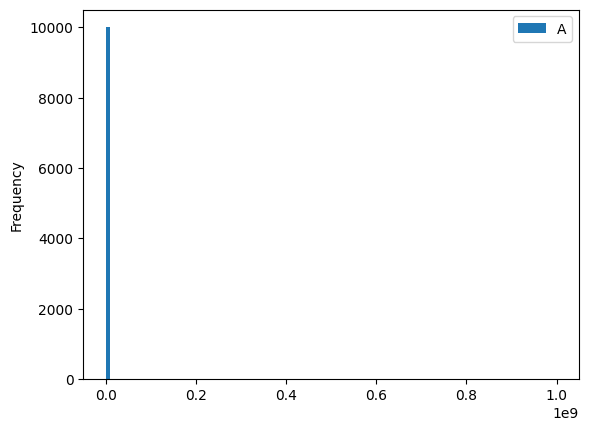

In [13]:
import numpy as np
import pandas as pd
print(np.arange(10000).shape)
print(np.array([1000000000]).shape)
df = pd.DataFrame({"A": np.concatenate((np.arange(10000), np.array([1000000000])))})
df.describe()
df.plot.hist(bins=100)